<p align="center">
  <a href="https://imc.uc.cl" target="_blank">
    <img src="attachment:dbc13321-47df-4da0-85d8-6f7591c31d88.png" alt="IMC" width="220">
  </a>
</p>

# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 10 - Aprendizaje supervisado: clasificación</center></h1>

Esta actividad busca aplicar distintos tipos de modelos para la clasificación de datos, además de analizar y comprender sus resultados.

## Instrucciones

Este Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 10 en Canvas.</b>

## Contexto

En astronomía, casi todo lo que conocemos sobre el universo observable proviene del estudio de la luz que llega a la Tierra.
A la medición de la cantidad de luz (o flujo) que emiten distintos objetos astronómicos se le llama **fotometría**.
Más específicamente, los astrónomos clasifican estos objetos a partir de la cantidad de flujo para distintas áreas del espectro de la luz (longitudes de onda). Esto se realiza utilizando filtros ópticos que permiten el paso de la luz solo para un rango limitado de longitudes de onda.

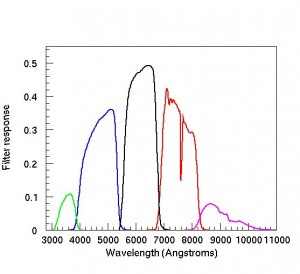

(Filtros *u, g, r, i, z* usados por SLOAN. Fuente: https://www.sdss4.org/instruments/camera/#Filters)

Los datos fotométricos que se obtienen corresponden a la cantidad de fotones detectados para cada longitud de onda, mediante los cuales los astrónomos pueden generar el espectro de un objeto.

Para esta actividad, utilizaremos datos de 100.000 mediciones hechas por el Sloan Digital Sky Survey (SDSS) y puestos a disposición del público el año 2022. El dataset original puede encontrarse aquí: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

#### Objetivo específico

Nuestro objetivo será entrenar y comparar modelos de aprendizaje supervisado capaces de diferenciar entre **estrellas, galaxias y cuásares** a partir de datos fotométricos.

## Rúbrica

- Si han logrado todo: 7.0
- Si han logrado hasta la pregunta 2: 5
- Si han logrado hasta la pregunta 3: 7
- La pregunta 4 es un bono adicional.

In [13]:
# acá van algunas librerías útiles, pero pueden agregar las adicionales que deseeen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


## 1. Lectura e inspección inicial

1. Lea el archivo `star_classification.csv` en un DataFrame, imprima todas sus columnas y sus estadísticos principales.

2. Identifique la columna que representa su vector $y$ (target, la etiqueta a clasificar). Transforme los valores a etiquetas numéricas para que puedan ser leídas por un modelo predictor.

3. Realice un gráfico que muestre la cantidad total de estrellas, galaxias y cuásares en su dataset. Responda:
* ¿Cómo se distribuyen estos datos? ¿Cuáles son sus respectivos porcentajes en relación al total de los datos?
* ¿Cómo cree que esta distribución podría afectar a un modelo de clasificación? Responda utilizando los términos de precisión y recall.

4. Grafique la matriz de correlación entre las columnas de su dataset. ¿Cuáles son las dos columnas con el mayor valor absoluto de correlación con la clase del objeto?

5. Utilice estas dos columnas como eje X e Y para graficar un scatterplot de sus datos. Use colores diferentes para representar las 3 clases, estrellas, galaxias y cuásares. (**Opción:** en `matplotlib.plotly`, puede utilizar la opción `plt.xscale("log")` o  `plt.yscale("log")` para modificar la escala de visualización de un eje.)

In [4]:
# respuestas
df = pd.read_csv("data 2025/star_classification.csv")
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [7]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [8]:
df.describe()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [11]:
#1,2  COlumna target es de "class"

df["class"].unique()


array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [37]:
le = LabelEncoder()
df['clase_codificada'] = le.fit_transform(df['class'])
print(df['clase_codificada'].unique())

[0 1 2]


In [38]:
print({cl: i for i, cl in enumerate(le.classes_)})

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}


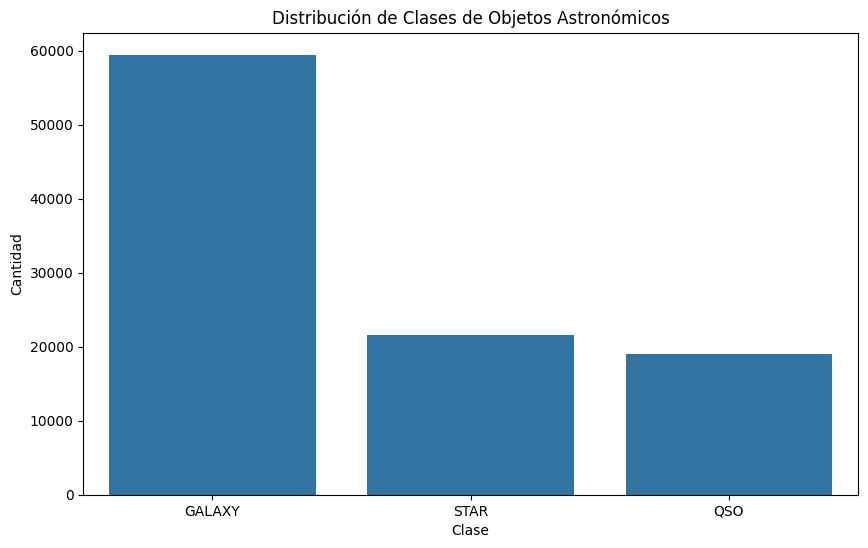

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, order = df['class'].value_counts().index)
plt.title('Distribución de Clases de Objetos Astronómicos')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

In [39]:
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100
print(class_counts)
print(class_percentages)

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64
class
GALAXY    59.445
STAR      21.594
QSO       18.961
Name: proportion, dtype: float64


Respuestas 1.3

Los datos presentan un desbalance de clases. La distribución y los porcentajes son los siguientes (los valores exactos son impresos por la celda de código anterior):

Galaxia: Es la clase mayoritaria.

Estrella: Es la segunda clase más frecuente.

QSO: Es la clase minoritaria.


Un desbalance de clases como este puede impactar significativamente el rendimiento de un modelo de clasificación. El modelo, al intentar minimizar el error global, puede volverse sesgado hacia la clase mayoritaria.

Precisión: La precisión para la clase mayoritaria (Galaxia) probablemente será alta, ya que el modelo predecirá esta clase con frecuencia y acertará a menudo. Sin embargo, para las clases minoritarias (Estrella y QSO), la precisión puede ser engañosa. Si el modelo predice raramente estas clases, las pocas veces que lo haga podría ser con alta precisión, pero esto no reflejaría su pobre capacidad para identificarlas en general.

Recall:El recall es la métrica que más probablemente se verá afectada negativamente, especialmente para las clases minoritarias (QSO y Estrella). El modelo podría tener muchas dificultades para identificar correctamente todas las instancias de estas clases, lo que resultaría en un bajo recall. En otras palabras, el modelo tendría una alta tasa de falsos negativos para las clases minoritarias (clasificaría estrellas y cuásares como galaxias). Para un problema como la clasificación de objetos astronómicos, un bajo recall para objetos raros como los cuásares podría significar que muchos de ellos no sean detectados

In [40]:
df_numerico = df.select_dtypes(include=np.number)

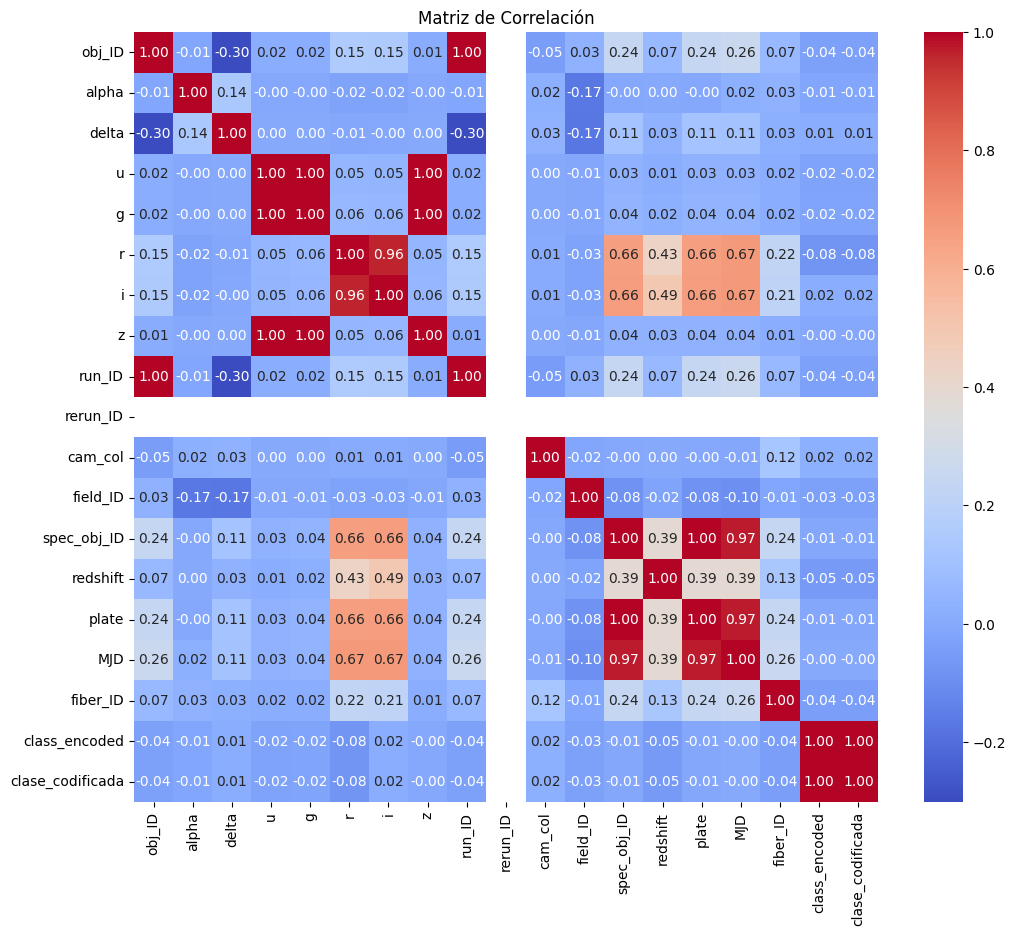

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numerico.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [42]:
correlacion_clase = df_numerico.corr()['clase_codificada'].abs().sort_values(ascending=False)
print(correlacion_clase)

class_encoded       1.000000
clase_codificada    1.000000
r                   0.076766
redshift            0.054239
fiber_ID            0.041586
run_ID              0.036014
obj_ID              0.036012
field_ID            0.034833
u                   0.024645
cam_col             0.023138
g                   0.020066
i                   0.015028
delta               0.014452
alpha               0.011756
spec_obj_ID         0.010060
plate               0.010060
z                   0.001614
MJD                 0.000405
rerun_ID                 NaN
Name: clase_codificada, dtype: float64


Respuesta 1.4

las 2 columnas con mayor correlacion con la clase target son "r" y "redsshift"

In [30]:
mas_altas_2 = correlacion_clase[1:3].index.tolist()

mas_alta_1 = mas_altas_2[0]
mas_alta_2 = mas_altas_2[1]



Text(0, 0.5, 'redshift')

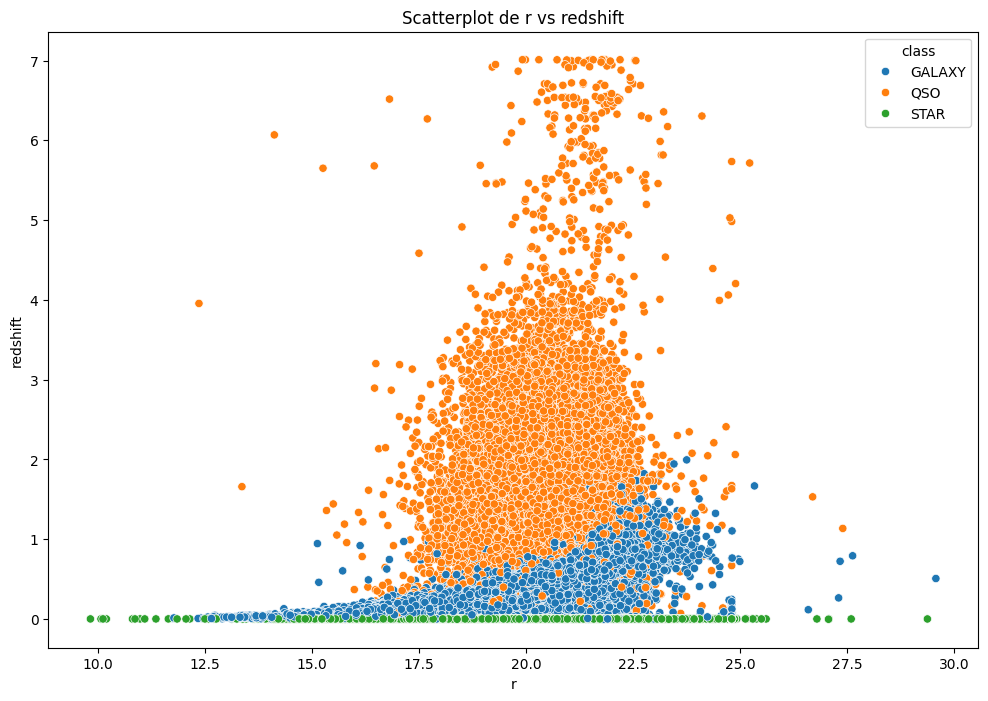

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=mas_alta_1, y=mas_alta_2, hue='class')
plt.title(f'Scatterplot de {mas_alta_1} vs {mas_alta_2}')
plt.xlabel(mas_alta_1)
plt.ylabel(mas_alta_2)

## 2. Preparando los datos para entrenar

Para entrenar nuestros modelos, vamos a probar y comparar dos acercamientos:

1. Cree la matriz $X_1$ que contenga todas las columnas de atributos disponibles en su dataframe. Por otra parte, cree $X_2$, pero esta vez solamente considere los datos fotométricos obtenidos en los 5 filtros que utiliza SLOAN, además del [redshift](https://es.wikipedia.org/wiki/Corrimiento_al_rojo) (corrimiento al rojo).

2. Cree el vector $y$ con las etiquetas a predecir.

3. Para $X_1$ y $X_2$ por separado, separe sus datos en conjuntos de entrenamiento y prueba (como matrices de atributos debería tener `X1_train, X1_test, X2_train, X2_test`).
No olvide normalizar todas sus matrices de atributos.

In [45]:
# algunas librerías útiles, puede agregar otras si las necesita
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# respuestas
columnas_a_excluir = ['obj_ID', 'class', 'clase_codificada', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID']
columnas_matriz_1 = [col for col in df.columns if col not in columnas_a_excluir]
matriz_caracteristicas_1 = df[columnas_matriz_1]

columnas_matriz_2 = ['u', 'g', 'r', 'i', 'z', 'redshift']
matriz_caracteristicas_2 = df[columnas_matriz_2]

vector_objetivo = df['clase_codificada']

In [48]:
X1_entrenamiento, X1_prueba, y_entrenamiento, y_prueba = train_test_split(
    matriz_caracteristicas_1, vector_objetivo, test_size=0.3, random_state=42, stratify=vector_objetivo
)
X2_entrenamiento, X2_prueba, _, _ = train_test_split(
    matriz_caracteristicas_2, vector_objetivo, test_size=0.3, random_state=42, stratify=vector_objetivo)

escalador_1 = StandardScaler()
X1_entrenamiento_norm = escalador_1.fit_transform(X1_entrenamiento)
X1_prueba_norm = escalador_1.transform(X1_prueba)

escalador_2 = StandardScaler()
X2_entrenamiento_norm = escalador_2.fit_transform(X2_entrenamiento)
X2_prueba_norm = escalador_2.transform(X2_prueba)

In [49]:
print("\nForma de los conjuntos de datos divididos y normalizados:")
print("X1_entrenamiento_norm:", X1_entrenamiento_norm.shape)
print("X1_prueba_norm:", X1_prueba_norm.shape)
print("X2_entrenamiento_norm:", X2_entrenamiento_norm.shape)
print("X2_prueba_norm:", X2_prueba_norm.shape)
print("y_entrenamiento:", y_entrenamiento.shape)
print("y_prueba:", y_prueba.shape)


Forma de los conjuntos de datos divididos y normalizados:
X1_entrenamiento_norm: (70000, 11)
X1_prueba_norm: (30000, 11)
X2_entrenamiento_norm: (70000, 6)
X2_prueba_norm: (30000, 6)
y_entrenamiento: (70000,)
y_prueba: (30000,)


## 3. Predictores

#### 3.1 KNN con todos los atributos ($X_1$)
Ahora vamos a crear nuestro primer modelo predictor. Entrene un modelo KNN con sus conjunto de entrenamiento `X1_train` y evalúelo solamente para el conjunto de prueba `X1_test`, retornando lo siguiente:
* Accuracy
* Precisión
* Recall
* F1
* Matriz de confusión (haga un gráfico que muestre estos valores)

#### 3.2 Árbol de decisión con todos los atributos ($X_1$)

Repita el proceso, esta vez con un modelo de tipo árbol de decisión. 

Responda:
* ¿Cómo se comportan los modelos? ¿Sucede o no sucede lo que esperaba (su respuesta a la sección 1.3)?
* ¿Cuál modelo tiene mejor desempeño?

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X1_entrenamiento_norm, y_entrenamiento)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
predicciones_knn = classifier.predict(X1_prueba_norm)


In [63]:
accuracy_knn = accuracy_score(y_prueba, predicciones_knn)
precision_knn = precision_score(y_prueba, predicciones_knn, average='weighted')
recall_knn = recall_score(y_prueba, predicciones_knn, average='weighted')
f1_knn = f1_score(y_prueba, predicciones_knn, average='weighted')

print("Acurracy:",accuracy_knn)
print("Precision:",precision_knn)
print("Recall:",recall_knn)
print("F1:",f1_knn)


Acurracy: 0.9995
Precision: 0.9995001866970844
Recall: 0.9995
F1: 0.9994997835051058


Confusion matrix: [[17833     1     0]
 [    9  5674     5]
 [    0     0  6478]]


Text(0.5, 1.0, 'Matriz de Confusión')

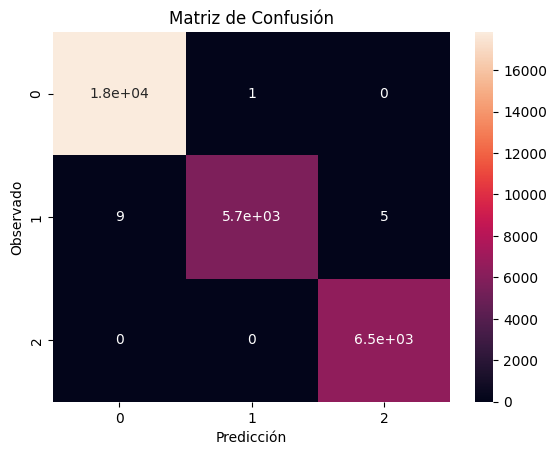

In [62]:
cm = confusion_matrix(y_prueba, predicciones_knn)

print('Confusion matrix:', cm)

#graficamos la matriz de confusión
sns.heatmap(cm, annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

Respuestas: 

#### 3.3 KNN con atributos filtrados ($X_2$)

Ahora, repetiremos el mismo proceso, pero utilizando nuestra matriz de atributos filtrados $X_2$. Entrene un modelo KNN con la misma cantidad de `n_neighbors`que definió para la sección 3.1. Nuevamente, imprima las mismas métricas y genere un gráfico de la matriz de confusión.

#### 3.4 Árbol de decisión con atributos filtrados ($X_2$)

Repita el proceso para el modelo de tipo árbol de decisión. También utilice los mismos hiperparámetros que utilizó en la sección 3.2.

Responda: 
* ¿Cómo se comportan ahora sus modelos? ¿Cómo se comparan con sus versiones anteriores?
* ¿Cuál de los 4 modelos elegiría?

In [ ]:
# respuestas

Respuestas:

## 4. Preguntas (BONUS de +1 punto)

Investigue en internet brevemente sobre el entrenamiento de modelos clasificadores con bases de datos desbalanceadas (*imbalabced data*) y responda:

* ¿Qué otras técnicas existen para abarcar estos problemas? Mencione y explique de manera concisa al menos 2.
* ¿Qué modelos suelen tener mejor desempeño en estos contextos? ¿Por qué?

Respuestas: